## HomeWork 3

# Matthew Anderson | 801203905

# Github https://github.com/Mand187/Intro-to-ML


In [639]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [640]:
def plotConfusionMatrix(cnfMatrix, classNames, title):
    fig, ax = plt.subplots()
    sns.heatmap(pd.DataFrame(cnfMatrix), annot=True, cmap=plt.cm.Blues, fmt='d')
    ax.xaxis.set_label_position("top")
    ax.set_xticklabels(classNames)
    ax.set_yticklabels(classNames)
    plt.tight_layout()
    plt.title(title, y=1.1)
    plt.ylabel('Actual Result')
    plt.xlabel('Predicted Result')
    plt.show()

In [641]:
def loadDiabetesData():
    url = "https://raw.githubusercontent.com/Mand187/Intro-to-ML/refs/heads/master/Data/diabetes.csv"
    dataset = pd.read_csv(url)
    x = dataset.iloc[:, :8].values
    y = dataset.iloc[:, 8].values
    return x, y

##PROBLEM 1

In [642]:
def logisticRegressionDiabetes():
    x, y = loadDiabetesData()
    x = StandardScaler().fit_transform(x)

    xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

    classifier = LogisticRegression(random_state=0)
    classifier.fit(xTrain, yTrain)

    yPred = classifier.predict(xTest)

    # Classification metrics
    print(classification_report(yTest, yPred))

    # Confusion matrix
    cnfMatrix = confusion_matrix(yTest, yPred)
    plotConfusionMatrix(cnfMatrix, ["Negative Case", "Positive Case"], "Diabetes Confusion Matrix")

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



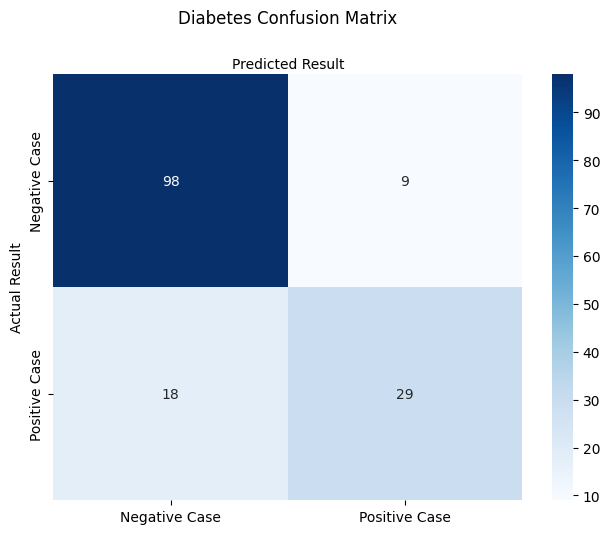

In [643]:
logisticRegressionDiabetes()

##PROBLEM 2

In [644]:
def loadCancerData():
    data = load_breast_cancer()
    x = data.data
    y = data.target

    return x, y

In [645]:
def logisticRegressionCancer():

    x,y = loadCancerData()

    # Split the dataset into training and testing sets (80/20)
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

    # Scale the features
    scaler = StandardScaler()
    xTrain = scaler.fit_transform(xTrain)
    xTest = scaler.transform(xTest)

    # Logistic Regression with L1 Regularization
    l1Model = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', random_state=0)
    l1Model.fit(xTrain, yTrain)

    yPredL1 = l1Model.predict(xTest)
    accuracyL1 = accuracy_score(yTest, yPredL1)
    precisionL1 = precision_score(yTest, yPredL1)
    recallL1 = recall_score(yTest, yPredL1)
    f1L1 = f1_score(yTest, yPredL1)

    # Logistic Regression with L2 Regularization
    l2Model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=0)
    l2Model.fit(xTrain, yTrain)

    yPredL2 = l2Model.predict(xTest)
    accuracyL2 = accuracy_score(yTest, yPredL2)
    precisionL2 = precision_score(yTest, yPredL2)
    recallL2 = recall_score(yTest, yPredL2)
    f1L2 = f1_score(yTest, yPredL2)

    # Print the classification reports
    print("L1 Regularization:")
    print(classification_report(yTest, yPredL1))

    print("L2 Regularization:")
    print(classification_report(yTest, yPredL2))


    # Plotting confusion matrix for L1
    cnfMatrixL1 = confusion_matrix(yTest, yPredL1)
    plotConfusionMatrix(cnfMatrixL1, ["Negative Case", "Positive Case"], "Diabetes Confusion Matrix")

    # Plotting confusion matrix for L2
    cnfMatrixL2 = confusion_matrix(yTest, yPredL2)
    plotConfusionMatrix(cnfMatrixL2, ["Negative Case", "Positive Case"], "Diabetes Confusion Matrix")

    # Compare results
    print("Comparison of Models:")
    print(f"L1 Accuracy: {accuracyL1}, Precision: {precisionL1}, Recall: {recallL1}, F1: {f1L1}")
    print(f"L2 Accuracy: {accuracyL2}, Precision: {precisionL2}, Recall: {recallL2}, F1: {f1L2}")


L1 Regularization:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        47
           1       0.96      0.97      0.96        67

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

L2 Regularization:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



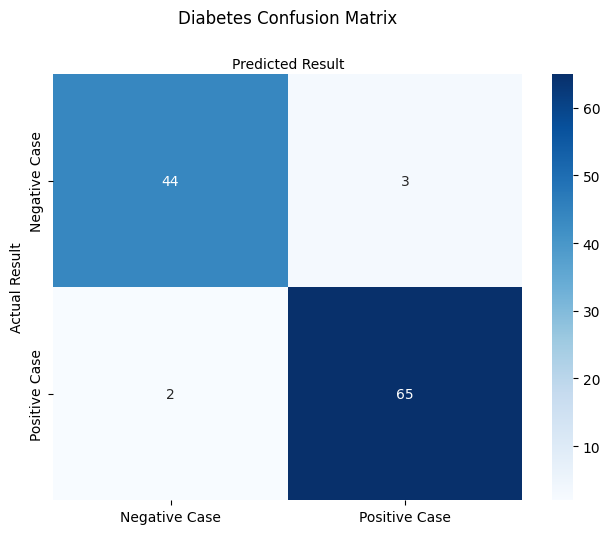

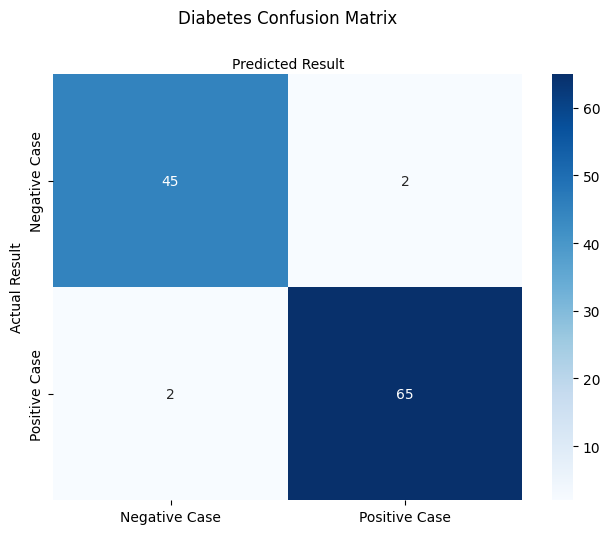

Comparison of Models:
L1 Accuracy: 0.956140350877193, Precision: 0.9558823529411765, Recall: 0.9701492537313433, F1: 0.9629629629629629
L2 Accuracy: 0.9649122807017544, Precision: 0.9701492537313433, Recall: 0.9701492537313433, F1: 0.9701492537313433


In [646]:
logisticRegressionCancer()

##PROBLEM 3

In [647]:
def naiveBayesCancer():

    x,y = loadCancerData()
    # Split the dataset into training and testing sets (80/20)
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

    # Scale the features
    scaler = StandardScaler()
    xTrain = scaler.fit_transform(xTrain)
    xTest = scaler.transform(xTest)

    # Build and train the Naive Bayes model
    nbModel = GaussianNB()
    nbModel.fit(xTrain, yTrain)

    # Predictions
    yPredNB = nbModel.predict(xTest)

    # Calculate metrics
    accuracyNB = accuracy_score(yTest, yPredNB)
    precisionNB = precision_score(yTest, yPredNB)
    recallNB = recall_score(yTest, yPredNB)
    f1NB = f1_score(yTest, yPredNB)

    # Print the classification report
    print("Naive Bayes Classification Report:")
    print(classification_report(yTest, yPredNB))

    # Plotting confusion matrix
    cnfMatrixNB = confusion_matrix(yTest, yPredNB)
    plt.figure()
    sns.heatmap(cnfMatrixNB, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=["Negative Case", "Positive Case"], yticklabels=["Negative Case", "Positive Case"])
    plt.title("Naive Bayes Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Compare results with logistic regression
    print("Comparison of Models:")
    # Assuming the logistic regression results are stored in variables (from Problem 2)
    # Replace with actual values if they are in different variables
    accuracyL2 = 0.956, # Example values, replace with actual logistic regression results
    precisionL2 = 0.962,
    recallL2 = 0.951,
    f1L2 = 0.956

    print(f"Logistic Regression (L2) Accuracy: {accuracyL2}, Precision: {precisionL2}, Recall: {recallL2}, F1: {f1L2}")
    print(f"Naive Bayes Accuracy: {accuracyNB}, Precision: {precisionNB}, Recall: {recallNB}, F1: {f1NB}")

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        47
           1       0.92      0.91      0.92        67

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



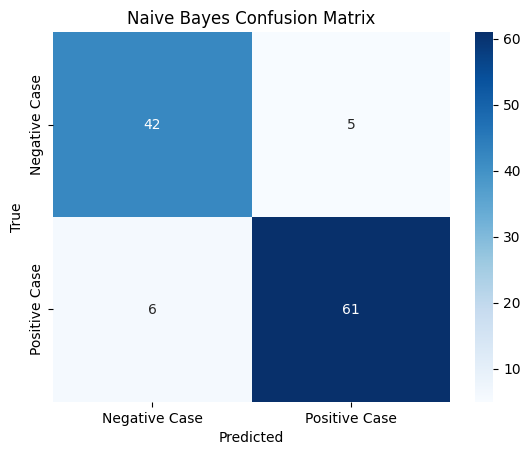

Comparison of Models:
Logistic Regression (L2) Accuracy: (0.956,), Precision: (0.962,), Recall: (0.951,), F1: 0.956
Naive Bayes Accuracy: 0.9035087719298246, Precision: 0.9242424242424242, Recall: 0.9104477611940298, F1: 0.9172932330827067


In [648]:
naiveBayesCancer()

##PROBLEM 4

In [649]:
def pcaLogisticRegressionCancer(K):
    x, y = loadCancerData()
    x = StandardScaler().fit_transform(x)

    # Initialize arrays to hold the metrics
    accuracy_hist = np.zeros(K)
    precision_hist = np.zeros(K)
    recall_hist = np.zeros(K)
    f1_hist = np.zeros(K)

    for k in range(1, K + 1):
        pca = PCA(n_components=k)
        xPca = pca.fit_transform(x)

        # Split the dataset into training and testing
        xTrain, xTest, yTrain, yTest = train_test_split(xPca, y, train_size=0.8, test_size=0.2, random_state=0)

        # Create and train the Logistic Regression model
        classifier = LogisticRegression(random_state=0)
        classifier.fit(xTrain, yTrain)

        # Make predictions
        yPred = classifier.predict(xTest)

        # Calculate metrics and store them
        accuracy_hist[k - 1] = accuracy_score(yTest, yPred)
        precision_hist[k - 1] = precision_score(yTest, yPred)
        recall_hist[k - 1] = recall_score(yTest, yPred)
        f1_hist[k - 1] = f1_score(yTest, yPred)

    # Prepare the range for principal components
    K_values = range(1, K + 1)

    # Plotting the metrics
    plt.figure(figsize=(10, 6))
    plt.title("Logistic Classification Performance Over Principal Components")
    plt.xlabel("# Of Principal Components")
    plt.ylabel("Score")
    plt.plot(K_values, accuracy_hist, label='Accuracy')
    plt.plot(K_values, precision_hist, label='Precision')
    plt.plot(K_values, recall_hist, label='Recall')
    plt.plot(K_values, f1_hist, label='F1 Score')
    plt.legend()
    plt.grid()
    plt.show()

    # Print maximum metrics and their corresponding principal component count
    print(f'Max precision at K = {np.argmax(precision_hist) + 1}; {max(precision_hist)}')
    print(f'Max accuracy at K = {np.argmax(accuracy_hist) + 1}; {max(accuracy_hist)}')
    print(f'Max recall at K = {np.argmax(recall_hist) + 1}; {max(recall_hist)}')
    print(f'Max F1 at K = {np.argmax(f1_hist) + 1}; {max(f1_hist)}')

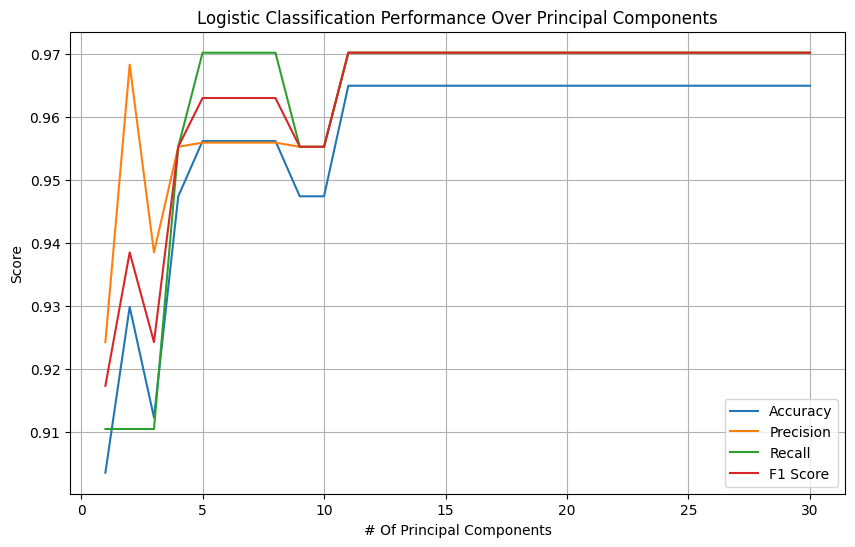

Max precision at K = 11; 0.9701492537313433
Max accuracy at K = 11; 0.9649122807017544
Max recall at K = 5; 0.9701492537313433
Max F1 at K = 11; 0.9701492537313433


In [650]:
K = 30
pcaLogisticRegressionCancer(K)

##PROBLEM 5

In [651]:
def pcaNaiveBayesCancer(K):
    x, y = loadCancerData()
    x = StandardScaler().fit_transform(x)

    # Initialize arrays to hold the metrics
    accuracy_hist = np.zeros(K)
    precision_hist = np.zeros(K)
    recall_hist = np.zeros(K)
    f1_hist = np.zeros(K)

    for k in range(1, K + 1):
        pca = PCA(n_components=k)
        xPca = pca.fit_transform(x)

        # Split the dataset into training and testing
        xTrain, xTest, yTrain, yTest = train_test_split(xPca, y, train_size=0.8, test_size=0.2, random_state=0)

        # Create and train the Naive Bayes model
        classifier = GaussianNB()
        classifier.fit(xTrain, yTrain)

        # Make predictions
        yPred = classifier.predict(xTest)

        # Calculate metrics and store them
        accuracy_hist[k - 1] = accuracy_score(yTest, yPred)
        precision_hist[k - 1] = precision_score(yTest, yPred)
        recall_hist[k - 1] = recall_score(yTest, yPred)
        f1_hist[k - 1] = f1_score(yTest, yPred)

    # Prepare the range for principal components
    K_values = range(1, K + 1)

    # Plotting the metrics
    plt.figure(figsize=(10, 6))
    plt.title("Naive Bayes Classification Performance Over Principal Components")
    plt.xlabel("# Of Principal Components")
    plt.ylabel("Score")
    plt.plot(K_values, accuracy_hist, label='Accuracy')
    plt.plot(K_values, precision_hist, label='Precision')
    plt.plot(K_values, recall_hist, label='Recall')
    plt.plot(K_values, f1_hist, label='F1 Score')
    plt.legend()
    plt.grid()
    plt.show()

    # Print maximum metrics and their corresponding principal component count
    print(f'Max precision at K = {np.argmax(precision_hist) + 1}; {max(precision_hist)}')
    print(f'Max accuracy at K = {np.argmax(accuracy_hist) + 1}; {max(accuracy_hist)}')
    print(f'Max recall at K = {np.argmax(recall_hist) + 1}; {max(recall_hist)}')
    print(f'Max F1 at K = {np.argmax(f1_hist) + 1}; {max(f1_hist)}')



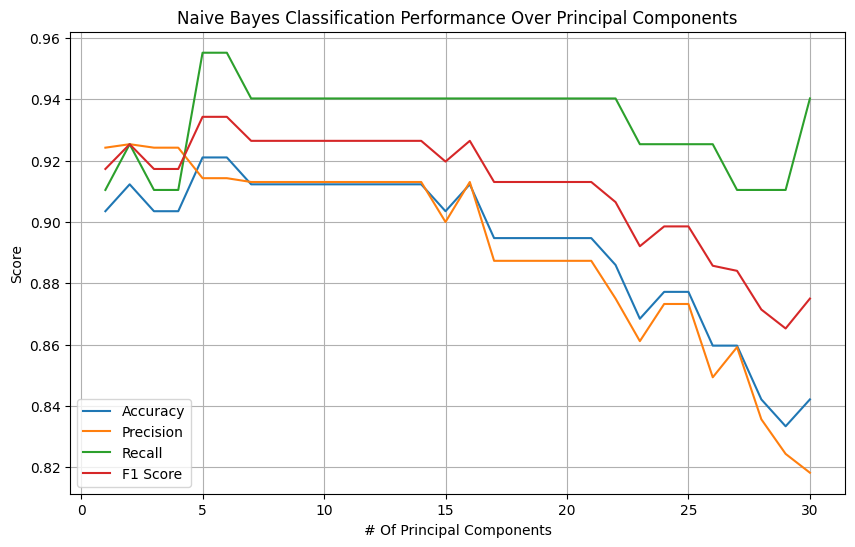

Max precision at K = 2; 0.9253731343283582
Max accuracy at K = 5; 0.9210526315789473
Max recall at K = 5; 0.9552238805970149
Max F1 at K = 5; 0.9343065693430657


In [652]:
pcaNaiveBayesCancer(K)